# **DATA DOWNLOAD**

In [1]:
import pandas as pd
import os

fname_tran ='../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv'
fname_cus ='../input/h-and-m-personalized-fashion-recommendations/customers.csv'
fname_article ='../input/h-and-m-personalized-fashion-recommendations/articles.csv'

In [2]:
data = pd.read_csv(fname_tran, sep=',')
data

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


# **PREPROCESS DATA**

In [3]:
using_cols = ['customer_id', 'article_id', 'price']
data = data[using_cols]
data.head(10)

,customer_id,article_id,price
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932
5,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932
6,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322
7,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492
8,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373
9,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746


In [4]:
# same customer buy same items -> increase count value 
data.loc[:,'count'] = 1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [5]:
data = data.groupby(['customer_id','article_id'], as_index=False).sum()
#because price is subordinated to article

In [6]:
data

,customer_id,article_id,price,count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023,0.035576,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,0.101661,2
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,0.050831,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008,0.012695,1
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,0.044051,1
...,...,...,...,...
27306434,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,821395003,0.016932,1
27306435,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,840360003,0.013542,1
27306436,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,866755002,0.094034,2
27306437,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,882810001,0.016932,1


In [7]:
user_unique = data['customer_id'].unique()
article_unique = data['article_id'].unique()

In [8]:
user_unique

array(['00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657',
       '0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa',
       '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318',
       ...,
       'ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264',
       'ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a',
       'ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241'],
      dtype=object)

In [9]:
user_to_idx = {v:k for k,v in enumerate(user_unique)}
article_to_idx = {v:k for k,v in enumerate(article_unique)}

In [10]:
temp_user_data = data['customer_id'].map(user_to_idx.get).dropna()

if len(temp_user_data) == len(data):  
    print('no-null')
    data['customer_id'] = temp_user_data   
else:
    print('detect null')

temp_artist_data = data['article_id'].map(article_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('no-null')
    data['article_id'] = temp_artist_data
else:
    print('detect null')

data

no-null
no-null


,customer_id,article_id,price,count
0,0,0,0.035576,1
1,0,1,0.101661,2
2,0,2,0.050831,1
3,0,3,0.012695,1
4,0,4,0.044051,1
...,...,...,...,...
27306434,1362279,25311,0.016932,1
27306435,1362279,19415,0.013542,1
27306436,1362279,11208,0.094034,2
27306437,1362279,22321,0.016932,1


# ALS

In [11]:
from scipy.sparse import csr_matrix

num_user = data['customer_id'].nunique()
num_artist = data['article_id'].nunique()

csr_data = csr_matrix((data['count'], (data.customer_id, data.article_id)), shape= (num_user, num_artist))
csr_data

<1362281x104547 sparse matrix of type '<class 'numpy.int64'>'
	with 27306439 stored elements in Compressed Sparse Row format>

In [12]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

In [13]:
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'
#article has 12 feature, customer estimatley has 6 and transaction data has 5
als_model = AlternatingLeastSquares(factors=360, regularization=0.01, use_gpu=True, iterations=5, dtype=np.float32, calculate_training_loss=True)

In [14]:
csr_data_transpose = csr_data.T
csr_data_transpose

<104547x1362281 sparse matrix of type '<class 'numpy.int64'>'
	with 27306439 stored elements in Compressed Sparse Column format>

In [15]:
history = als_model.fit(csr_data_transpose)

  0%|          | 0/5 [00:00<?, ?it/s]

In [16]:
a_user, a_article = user_to_idx['000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'], article_to_idx[176209023]
a_user_vector, a_article_vector = als_model.user_factors[a_user], als_model.item_factors[a_article]

In [17]:
test_article = article_to_idx[176209023]
test_article_vector = als_model.item_factors[test_article]
np.dot(a_user, test_article_vector)

array([ 0.01200635,  0.00110115,  0.00844319,  0.0090615 ,  0.00860074,
        0.01046015,  0.01645504,  0.01006623,  0.01123869,  0.01471766,
        0.01438741,  0.012015  ,  0.0163581 ,  0.00905504,  0.01562472,
        0.01512864,  0.00637031,  0.00827339,  0.01088364,  0.01326729,
        0.00561953,  0.00765687,  0.01712318,  0.01741443,  0.00943946,
        0.0173856 ,  0.01252356,  0.01190486,  0.01071173,  0.02293577,
        0.01345391,  0.01346855,  0.01283405,  0.01548555,  0.01214875,
        0.00886891,  0.00832437,  0.01285417,  0.01375816,  0.02205606,
        0.01838961,  0.01572582,  0.00881311,  0.00663596,  0.01534508,
       -0.00325739,  0.00825202,  0.01086878,  0.00420109,  0.01345981,
        0.00790506,  0.00578502,  0.02008856,  0.01391962,  0.01466946,
        0.00671255,  0.00807897,  0.01722314,  0.012519  ,  0.0034705 ,
        0.01288748,  0.01426155,  0.01215979,  0.00610222,  0.01362257,
        0.01600705,  0.02407969,  0.01302852,  0.00551913,  0.01

In [18]:
a_test_article = 176209023
movie_id = article_to_idx[a_test_article]
similar_article = als_model.similar_items(movie_id, N=15)
similar_article

[(0, 1.0),
 (10524, 0.94584775),
 (29880, 0.9451308),
 (22526, 0.94485813),
 (27296, 0.94329464),
 (29429, 0.9432604),
 (47030, 0.94300085),
 (46820, 0.94254863),
 (34283, 0.94234586),
 (27750, 0.9422807),
 (10899, 0.94199073),
 (51286, 0.9419763),
 (14111, 0.94196546),
 (34047, 0.941899),
 (17234, 0.9418562)]

In [19]:
idx_to_article = {v:k for k,v in article_to_idx.items()}
j = [idx_to_article[i[0]] for i in similar_article]
print(j)

[176209023, 632803008, 649440017, 477163001, 547300001, 411758001, 649440022, 670334022, 647781003, 742258014, 619561014, 176209039, 491912014, 803543002, 670334004]


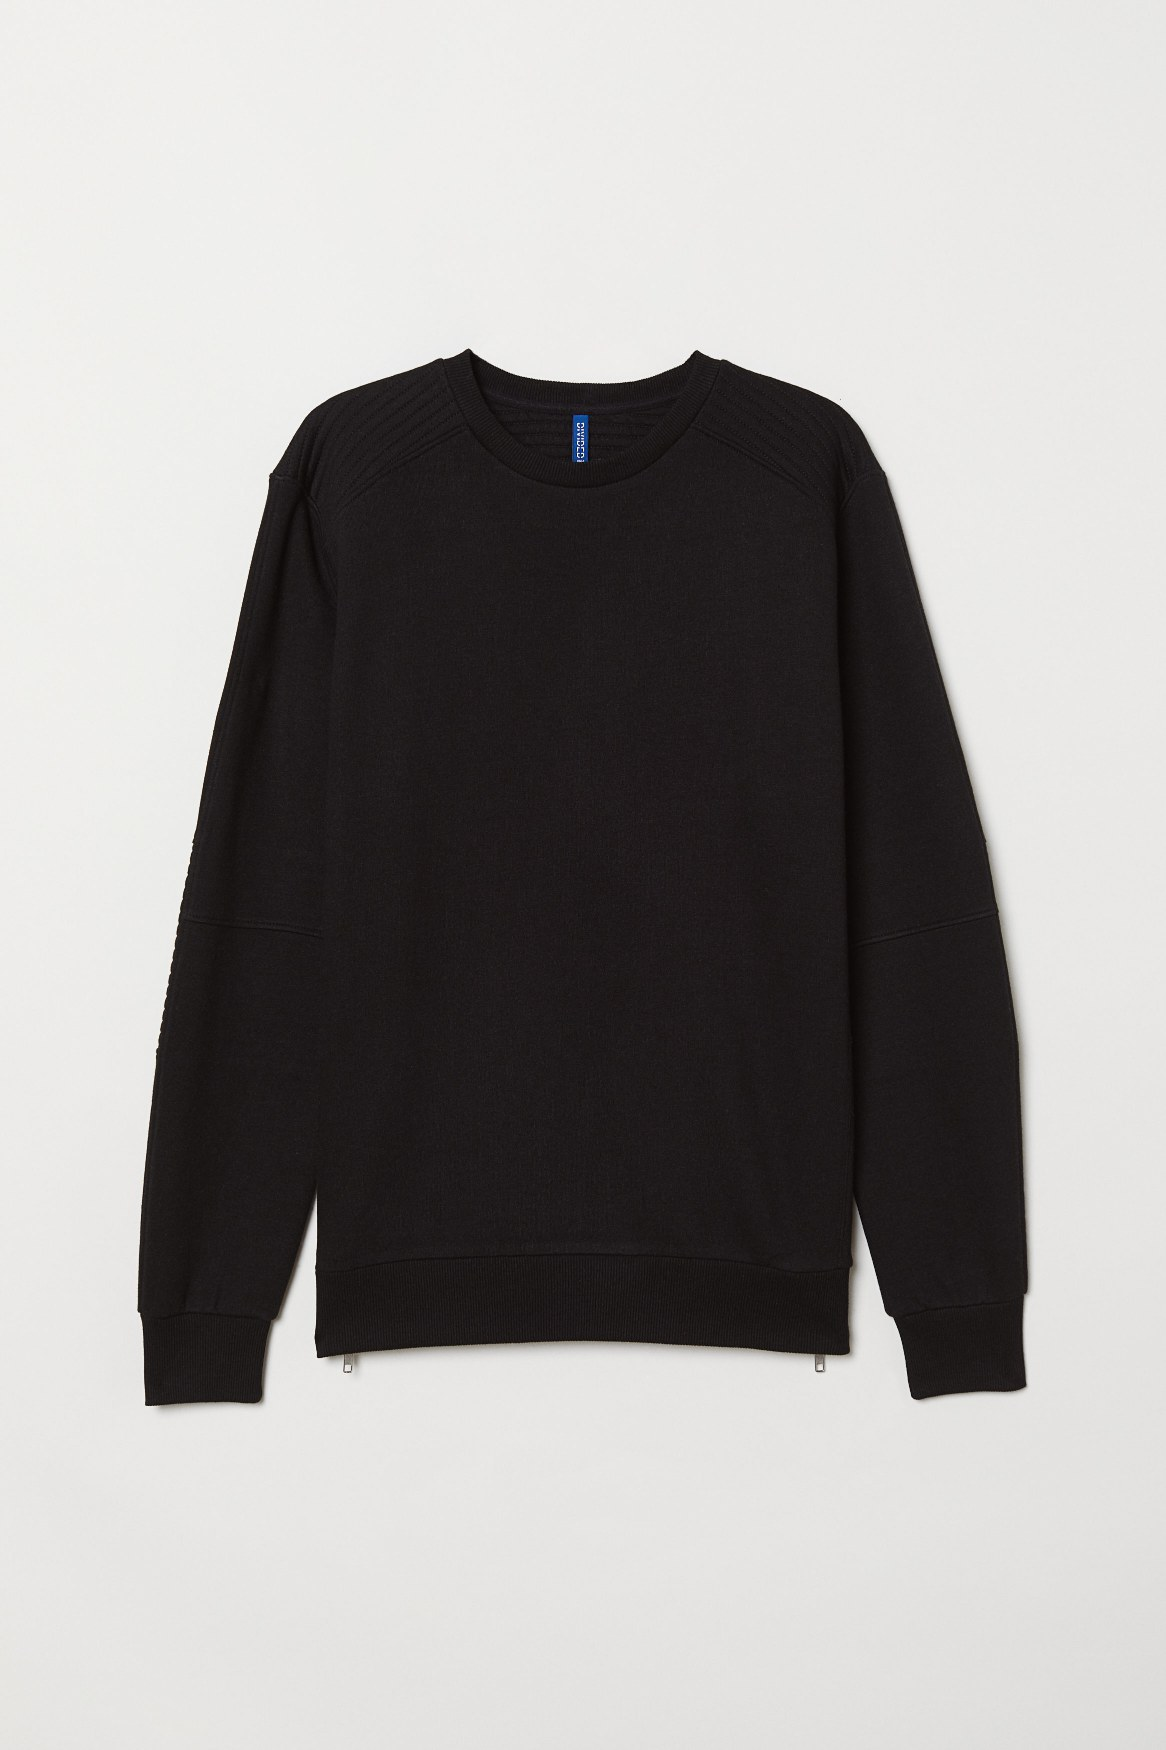

In [20]:
from IPython.display import Image
num_sim = 4
Image(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(j[num_sim])[:2]}/0{int(j[num_sim])}.jpg' , width = 200)

In [21]:
user = user_to_idx['00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657']
# recommend에서는 user*item CSR Matrix를 받습니다.
article_recommended = als_model.recommend(user, csr_data, N=12, filter_already_liked_items=True)
article_recommended

[(7318, 0.21753883),
 (10087, 0.07906615),
 (6224, 0.06993221),
 (151, 0.057641603),
 (42, 0.047243997),
 (2321, 0.045409866),
 (5531, 0.04356716),
 (7826, 0.040428296),
 (6075, 0.039329857),
 (73, 0.038872693),
 (1416, 0.038599487),
 (3288, 0.037376232)]

In [22]:
k = [str(idx_to_article[i[0]]) for i in article_recommended]
print(' '.join(k))

795440003 671852003 688105002 578478001 658298001 748269003 111565001 756633001 610776028 796137001 795440007 806388002


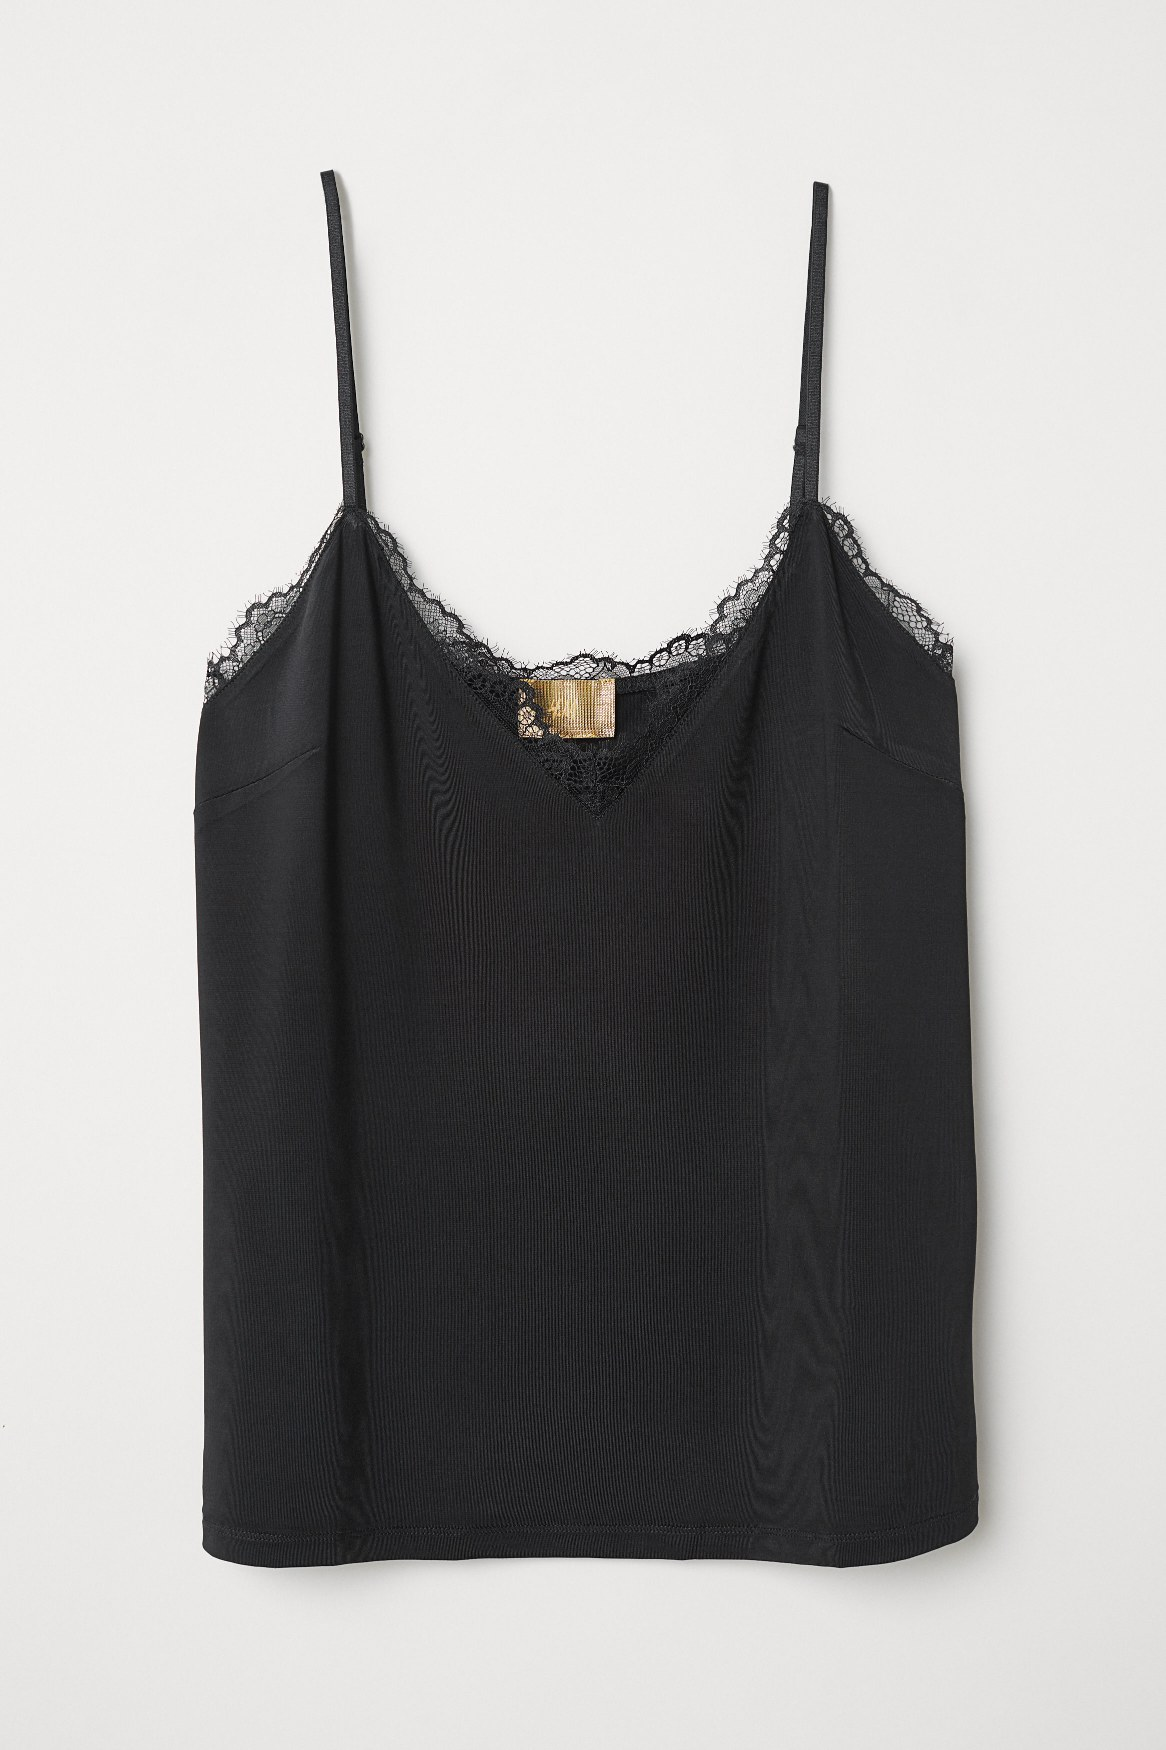

In [23]:
from IPython.display import Image
num = 1
Image(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(k[num])[:2]}/0{int(k[num])}.jpg' , width = 200)